In [9]:
import torch
from torch import nn
from torch.nn import functional as f
import torchvision
from torchvision import transforms,datasets
from matplotlib import pyplot as plt

In [54]:
if torch.cuda.is_available():
    dev="cuda"  
device=torch.device(dev)


train = datasets.MNIST("",train=True,download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("",train=False,download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size=64,shuffle=True,pin_memory=True)
testset = torch.utils.data.DataLoader(test,batch_size=64,shuffle=True,pin_memory=True)


In [87]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.avgpool=nn.AvgPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),stride=1,padding=2)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(5,5),stride=1,padding=0)
        self.fc0=nn.Linear(in_features=16*5*5,out_features=120)
        self.fc1=nn.Linear(in_features=120,out_features=84)
        self.fc2=nn.Linear(in_features=84,out_features=10)
        
    def forward(self,x):
        x=f.relu(self.conv1(x))
        x=self.avgpool(x)
        
        x=f.relu(self.conv2(x))
        x=self.avgpool(x)

        
        x=x.reshape(-1,16*5*5)
       
        
        x=f.relu(self.fc0(x))
        x=f.relu(self.fc1(x))
        x=self.fc2(x)
        
        return x

In [88]:
net=LeNet().to(device)
print(next(net.parameters()).is_cuda)

True


In [89]:
lossf=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.001)

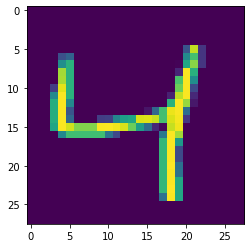

In [90]:
plt.imshow(train[2][0].view(28,28))

In [91]:
from tqdm import tqdm
Epochs=10
loss_score=[]
epoches=[]
for i in range(Epochs):
    for data in tqdm(trainset):
        x , y = data
        x , y = x.to(device),y.to(device)
        net.zero_grad()
        output=net.forward(x)
        loss=lossf(output,y)
        loss.backward()
        optimizer.step()
    loss_score.append(loss)
    epoches.append(i)
    print(loss)
  


  1%|▍                                                   | 7/938 [00:00<00:13, 69.02it/s]

tensor(0.1568, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▍                                                   | 7/938 [00:00<00:15, 61.71it/s]

tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▍                                                   | 7/938 [00:00<00:14, 65.90it/s]

tensor(0.0905, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▍                                                   | 8/938 [00:00<00:12, 72.40it/s]

tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▍                                                   | 7/938 [00:00<00:14, 64.26it/s]

tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▍                                                   | 7/938 [00:00<00:15, 60.91it/s]

tensor(0.0232, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▎                                                   | 6/938 [00:00<00:16, 56.50it/s]

tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▍                                                   | 8/938 [00:00<00:13, 69.57it/s]

tensor(0.0652, device='cuda:0', grad_fn=<NllLossBackward0>)


  1%|▎                                                   | 6/938 [00:00<00:16, 57.26it/s]

tensor(0.0147, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████████████████████████████████████████████| 938/938 [00:13<00:00, 69.33it/s]

tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward0>)


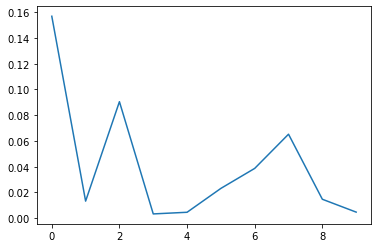

In [94]:
plt.plot(epoches,loss_score)